In here we tried to increase convergence in parallel nsim by using quasi Monte Carlo. We tried this on our main example (later we will try to fix this):

# 1 step quasi RMC 

In [104]:
from random import random
from scipy.stats.qmc import Halton
import numpy as np


def Y(t): return 1 + (Y(random()*t) if random()<t else 0)
def split(t,nsim,fun): return sum(fun(t) for _ in range(nsim))/nsim
def y(t,nsim):return split(t,nsim,Y)

def yq(t,nsim):
    sampler = Halton(d=1)
    sample=sampler.random(n=nsim)
    return sum(1+t*Y(t*s) for s in sample)/nsim

print(np.var(np.array([y(1,10**2) for _ in range(10**2)])))
print(np.var(np.array([yq(1,10**2) for _ in range(10**2)])))



0.006426750000000001
0.004500189999999996


# 2 step quasi RMC

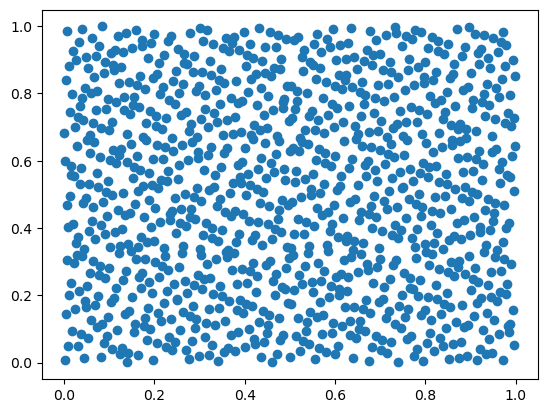

In [1]:
from random import random
from scipy.stats.qmc import Halton
import matplotlib.pyplot as plt

sampler = Halton(d=2)
sample=sampler.random(n=10**3)
x,y = zip(*sample)

plt.scatter(x,y)
plt.show()

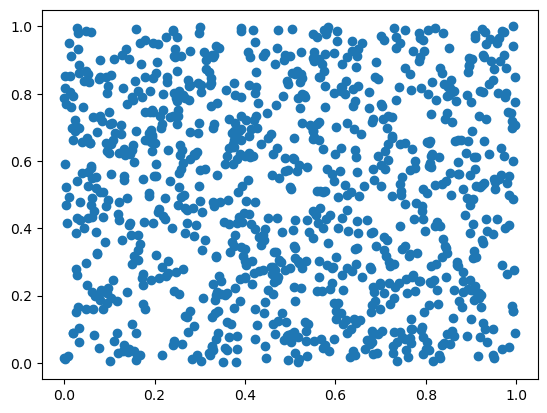

In [2]:
from random import random
import matplotlib.pyplot as plt

nsim = 10**3
x = [random() for _ in range(nsim)]
y = [random() for _ in range(nsim)]

plt.scatter(x,y)
plt.show()

In [185]:

from random import random
from scipy.stats.qmc import Halton
import numpy as np


def Y(t): return 1 + (Y(random()*t) if random()<t else 0)
def Ys(t,n): return 1 + t*Ys(random()*t,n-1) if n!=0 else Y(t)

def y(t,nsim):return sum(Ys(t,2) for _ in range(nsim))/nsim

def yq(t,nsim):
    sampler = Halton(d=2)
    sample=sampler.random(n=nsim)
    return sum(1+t*(1+t*s[0]*(Y(t*s[0]*s[1]))) for s in sample)/nsim

def test():
    print(np.var(np.array([y(1,10**2) for _ in range(10**2)])))
    print(np.var(np.array([yq(1,10**2) for _ in range(10**2)])))
test()

0.004651466413660068
0.0014018460250646272


# n step quasi RMC


In [100]:
from random import random
from math import sqrt
from scipy.stats.qmc import Halton
from numba import njit, prange
import numpy as np

@njit(fastmath=True)
def Y(t):
    sol,s,w=1,t,1
    while random()<s:
        sol +=w
        s*= random()
        w*=1 if s<1 else s
    return sol

@njit(fastmath=True)
def Ys(t,n): return 1 + t*Ys(random()*t,n-1) if n!=0 else Y(t)


def yq(t,nsim,depth):
    sampler = Halton(d=depth)
    sample=sampler.random(n=nsim)
    return AAAA(t,sample,depth)
        
@njit(fastmath=True)
def AAAA(t,sample,depth):
    sol = 0.0
    sol2= 0.0
    for halfpath in sample:
        tmp,q = 1,t
        for s in halfpath[:-2]:
            tmp +=q
            q*= s
        tmp +=q*Ys(q*halfpath[-1],10-depth)
        sol+=tmp/len(sample)
        sol2 += tmp**2/len(sample)
    return sol, sqrt(sol2-sol**2)



In [101]:
from math import sqrt
def test(nsim = 2**10):
    print(f"nsim={nsim}")
    for i in range(1,10):
        print(i,":",yq(1,nsim,i))
    

In [102]:
test(2**18)

nsim=262144
1 : (2.718357341025897, 0.5370182800051317)
2 : (2.7191954201602253, 0.5388697613773371)
3 : (2.7182423822505086, 0.5369781568068571)
4 : (2.8178918670880058, 0.5609466435553359)
5 : (2.896458724416943, 0.6074802201831848)
6 : (2.9443981912101655, 0.6469463746178576)
7 : (2.970980869039258, 0.6730592201433373)
8 : (2.98509845578667, 0.6885944556169195)
9 : (2.9924299379403134, 0.6973429369216464)
